<a href="https://colab.research.google.com/github/dheerajjoshim/machinelearningcourse/blob/master/Employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Y=MX+C+Errors
#Y- Dependent Variable
#X= Independent Variable
#m - slope
#C- constant 
#Errors - Inevitable part of prediction :D 



In [1]:
#The data is self created dataset from our ML team which consists of Employee name, ID & their Salary,
    #to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
import numpy as np #python library for numerical functions
import pandas as pd #for making dataframes
import scipy.stats as stats #library for statistics functions like probability etc
import statsmodels.api as sm #python library for stats models
import matplotlib.pyplot as plt # to plot charts
import sklearn  #python library for linear models & others
from sklearn.linear_model import LinearRegression 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files #loading data from google colab
uploaded = files.upload()

Saving Employees_Details.csv to Employees_Details.csv


In [3]:
#loading data from csv file in jupyter notebook
#data = pd.read_csv('Employees_Details.csv') #It is used to read a csv(comma separated values) file  and convert to pandas dataframe.
#Pandas DataFrames is generally used for representing Excel Like Data In-Memory. 
#A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.
#data.head()
import io
data = pd.read_csv(io.BytesIO(uploaded['Employees_Details.csv']))


In [4]:
data.head(5) #Read first 5 entries

,Employee_Name,Employee_ID,Age,Department,Location,Experience,Role,ML,Python,Salary
0,Gabrielle Smith,82036322,30,5G,L5,4.0,Engineer,No,Yes,26.0
1,Nathan Howard,57825244,25,5G,M2,3.0,Engineer,No,Yes,24.0
2,Yvonne Wilson,67211472,27,5G,M2,3.6,Engineer,Yes,Yes,24.2
3,Alison Greene,57816451,27,5G,L5,6.4,Engineer,No,Yes,32.8
4,Dominic Turner,57819904,26,5G,L6,5.9,Engineer,No,Yes,32.8


In [5]:
data.shape #number of rows & columns 

(580, 10)

In [9]:
data.describe() #gives the statistics of the data

,Employee_ID,Age,Experience,Salary
count,5.800000e+02,580.000000,580.000000,580.000000
mean,6.506523e+07,32.865517,9.583552,43.713655
std,1.234316e+07,5.464837,4.970412,14.862228
min,1.100113e+07,21.000000,0.700000,18.400000
25%,5.777115e+07,29.000000,6.000000,32.800000
50%,5.787398e+07,33.000000,9.000000,43.000000
75%,7.627751e+07,37.000000,13.000000,54.000000
max,9.360807e+07,50.000000,26.000000,90.000000


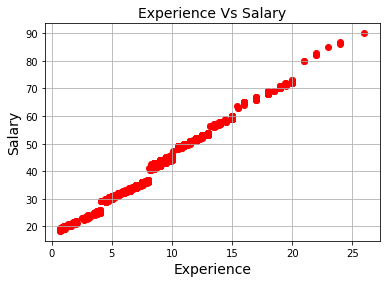

In [10]:
#Plotting of graphs to see the relation between dependent & independent variable 
plt.scatter(data['Experience'], data['Salary'], color='red')
plt.title('Experience Vs Salary', fontsize=14)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Salary',fontsize=14)
plt.grid(True)
#plt.show()

In [11]:
data.corr()

,Employee_ID,Age,Experience,Salary
Employee_ID,1.000000,-0.084115,-0.100345,-0.100921
Age,-0.084115,1.000000,0.949342,0.945992
Experience,-0.100345,0.949342,1.000000,0.995650
Salary,-0.100921,0.945992,0.995650,1.000000


In [14]:
#Pandas DataFrames is generally used for representing Excel Like Data In-Memory. 
#A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.
df = pd.DataFrame(data,columns=['Employee_Name','Employee_ID','Age','Department','Location','Experience','Role',
                                'ML','Python','Salary'])


In [25]:

X = df[['Experience']] #Independent Variable
Y = df['Salary'] #DEpendent Variable
#print(X)
#print(Y)



In [ ]:
# with sklearn its just 4 lines of code
regr = LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#print('Mean squared error: \n',(np.mean((regr.predict(X)-Y) ** 2)))
#print('variance score: \n',regr.score(X,Y))
#from sklearn import metrics  
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y,(regr.predict(X))))

#print('Mean Squared Error:', metrics.mean_squared_error(Y, (regr.predict(X))))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y,(regr.predict(X)))))

#Y_pred= regr.predict(X),Y
#The predict() function can evaluate response for a given input value (or list of values)
#print(Y[0:10],Y_pred[0:10])
#plt.scatter(regr.predict(X),Y)
#plt.show()

In [27]:
#This output includes the intercept and coefficients. 
#You can use this information to build the multiple linear regression equation as follows:
#y=mx+c
#Salary = (Experience coef)*X1 + (Intercept) 

#And once you plug the numbers:

#Salary = (2.97713281)*X1 +  15.18214885382827

# prediction with sklearn
New_Experience = 5

print ('Predicted Salary: \n', regr.predict([[New_Experience]]))

#Salary = (2.97713281)*X1 +  15.18214885382827
#Salary = (2.97713281)* 5 +  15.18214885382827
#Salary = 30.06781290382827

Predicted Salary: 
 [30.06781293]


In [28]:
#Ordinary Least-Squares (OLS) Regression, is probably the most commonly used technique in Statistical Learning. 
#It is also the oldest, dating back to the eighteenth century and the work of Carl Friedrich Gauss and Adrien-Marie Legendre. 
#It is also one of the easier and more intuitive techniques to understand, and it provides a good basis for learning more advanced concepts and techniques. 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 #Example : Can you tell me why do we have this constant in the equation ? What significance it has? 
#Salary = (2.97713281)*X1 +  15.18214885382827
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.600e+04
Date:                Fri, 14 Aug 2020   Prob (F-statistic):               0.00
Time:                        05:43:24   Log-Likelihood:                -1011.3
No. Observations:                 580   AIC:                             2027.
Df Residuals:                     578   BIC:                             2035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1821      0.125    121.378      0.0

In [ ]:
#Assignment is to plot all the model evaluation graphs like Residual Plots, PP-plots, Scatter Plots